In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5102,9070-BCKQP,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.15,7881.2,No
2344,9796-MVYXX,Female,1,No,No,14,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,39.70,692.35,No
2027,3778-FOAQW,Female,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.15,456.85,No
1533,8519-QJGJD,Female,0,No,No,14,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.35,1025.95,Yes
1853,1612-EOHDH,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.15,45.15,Yes


In [10]:
df.drop('customerID',axis='columns',inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/home/markfirmware/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [14]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


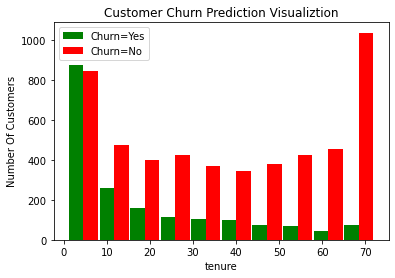

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/home/markfirmware/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/home/markfirmware/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [20]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [22]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [24]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [25]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
def ANN(X_train,y_train,X_test,y_test,Loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=Loss,metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    return y_preds

In [28]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 0s 788us/step - loss: 0.4992 - accuracy: 0.7513
Epoch 2/100
176/176 [==============================] - 0s 768us/step - loss: 0.4339 - accuracy: 0.7876
Epoch 3/100
176/176 [==============================] - 0s 773us/step - loss: 0.4259 - accuracy: 0.7943
Epoch 4/100
176/176 [==============================] - 0s 783us/step - loss: 0.4196 - accuracy: 0.7977
Epoch 5/100
176/176 [==============================] - 0s 779us/step - loss: 0.4151 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 773us/step - loss: 0.4135 - accuracy: 0.8028
Epoch 7/100
176/176 [==============================] - 0s 774us/step - loss: 0.4106 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 763us/step - loss: 0.4103 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 0s 774us/step - loss: 0.4084 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 0s 798us/step - l

176/176 [==============================] - 0s 775us/step - loss: 0.3591 - accuracy: 0.8290
Epoch 80/100
176/176 [==============================] - 0s 785us/step - loss: 0.3575 - accuracy: 0.8302
Epoch 81/100
176/176 [==============================] - 0s 821us/step - loss: 0.3565 - accuracy: 0.8297
Epoch 82/100
176/176 [==============================] - 0s 892us/step - loss: 0.3567 - accuracy: 0.8318
Epoch 83/100
176/176 [==============================] - 0s 814us/step - loss: 0.3555 - accuracy: 0.8286
Epoch 84/100
176/176 [==============================] - 0s 769us/step - loss: 0.3556 - accuracy: 0.8302
Epoch 85/100
176/176 [==============================] - 0s 759us/step - loss: 0.3551 - accuracy: 0.8279
Epoch 86/100
176/176 [==============================] - 0s 778us/step - loss: 0.3543 - accuracy: 0.8324
Epoch 87/100
176/176 [==============================] - 0s 767us/step - loss: 0.3543 - accuracy: 0.8309
Epoch 88/100
176/176 [==============================] - 0s 801us/step - loss:

In [29]:
count_class_0,count_class_1 = df1.Churn.value_counts()

In [30]:
count_class_0,count_class_1

(5163, 1869)

In [31]:
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [32]:
#performing undersampling for majority dataset
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

In [33]:
print(df_test_under.Churn.value_counts())

1    1869
0    1869
Name: Churn, dtype: int64


In [34]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [37]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',weights=-1)

Epoch 1/100
94/94 [==============================] - 0s 825us/step - loss: 0.5780 - accuracy: 0.7221
Epoch 2/100
94/94 [==============================] - 0s 765us/step - loss: 0.5093 - accuracy: 0.7599
Epoch 3/100
94/94 [==============================] - 0s 753us/step - loss: 0.4958 - accuracy: 0.7679
Epoch 4/100
94/94 [==============================] - 0s 788us/step - loss: 0.4894 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 791us/step - loss: 0.4845 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 777us/step - loss: 0.4793 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 788us/step - loss: 0.4759 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 764us/step - loss: 0.4737 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 773us/step - loss: 0.4724 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 0s 765us/step - loss: 0.4696 - accura

94/94 [==============================] - 0s 852us/step - loss: 0.3943 - accuracy: 0.8244
Epoch 82/100
94/94 [==============================] - 0s 800us/step - loss: 0.3947 - accuracy: 0.8268
Epoch 83/100
94/94 [==============================] - 0s 770us/step - loss: 0.3924 - accuracy: 0.8241
Epoch 84/100
94/94 [==============================] - 0s 775us/step - loss: 0.3931 - accuracy: 0.8264
Epoch 85/100
94/94 [==============================] - 0s 863us/step - loss: 0.3923 - accuracy: 0.8254
Epoch 86/100
94/94 [==============================] - 0s 756us/step - loss: 0.3909 - accuracy: 0.8227
Epoch 87/100
94/94 [==============================] - 0s 788us/step - loss: 0.3903 - accuracy: 0.8278
Epoch 88/100
94/94 [==============================] - 0s 782us/step - loss: 0.3886 - accuracy: 0.8291
Epoch 89/100
94/94 [==============================] - 0s 828us/step - loss: 0.3891 - accuracy: 0.8258
Epoch 90/100
94/94 [==============================] - 0s 811us/step - loss: 0.3865 - accuracy: 

In [38]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_sample(X,y)
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [48]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [49]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 789us/step - loss: 0.5090 - accuracy: 0.7550
Epoch 2/100
259/259 [==============================] - 0s 774us/step - loss: 0.4674 - accuracy: 0.7772
Epoch 3/100
259/259 [==============================] - 0s 765us/step - loss: 0.4589 - accuracy: 0.7823
Epoch 4/100
259/259 [==============================] - 0s 786us/step - loss: 0.4533 - accuracy: 0.7839
Epoch 5/100
259/259 [==============================] - 0s 803us/step - loss: 0.4489 - accuracy: 0.7875
Epoch 6/100
259/259 [==============================] - 0s 768us/step - loss: 0.4462 - accuracy: 0.7881
Epoch 7/100
259/259 [==============================] - 0s 766us/step - loss: 0.4425 - accuracy: 0.7925
Epoch 8/100
259/259 [==============================] - 0s 767us/step - loss: 0.4378 - accuracy: 0.7933
Epoch 9/100
259/259 [==============================] - 0s 764us/step - loss: 0.4327 - accuracy: 0.7955
Epoch 10/100
259/259 [==============================] - 0s 766us/step - l

259/259 [==============================] - 0s 769us/step - loss: 0.3367 - accuracy: 0.8565
Epoch 80/100
259/259 [==============================] - 0s 765us/step - loss: 0.3394 - accuracy: 0.8551
Epoch 81/100
259/259 [==============================] - 0s 774us/step - loss: 0.3371 - accuracy: 0.8552
Epoch 82/100
259/259 [==============================] - 0s 763us/step - loss: 0.3355 - accuracy: 0.8528
Epoch 83/100
259/259 [==============================] - 0s 774us/step - loss: 0.3358 - accuracy: 0.8563
Epoch 84/100
259/259 [==============================] - 0s 763us/step - loss: 0.3345 - accuracy: 0.8550
Epoch 85/100
259/259 [==============================] - 0s 768us/step - loss: 0.3346 - accuracy: 0.8551
Epoch 86/100
259/259 [==============================] - 0s 760us/step - loss: 0.3343 - accuracy: 0.8571
Epoch 87/100
259/259 [==============================] - 0s 763us/step - loss: 0.3360 - accuracy: 0.8523
Epoch 88/100
259/259 [==============================] - 0s 769us/step - loss:

In [51]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [52]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
9322,0,0,0,0,0.052441,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
3839,1,0,1,1,0.098592,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9036,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
2633,0,0,0,0,0.718310,1,0,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1842,1,0,1,1,0.760563,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [53]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [63]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train['Churn']
    return X_train,y_train

In [66]:
X_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)
y_pred = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 0s 803us/step - loss: 0.5469 - accuracy: 0.7319
Epoch 2/100
176/176 [==============================] - 0s 766us/step - loss: 0.4005 - accuracy: 0.8300
Epoch 3/100
176/176 [==============================] - 0s 781us/step - loss: 0.3897 - accuracy: 0.8324
Epoch 4/100
176/176 [==============================] - 0s 781us/step - loss: 0.3839 - accuracy: 0.8370
Epoch 5/100
176/176 [==============================] - 0s 781us/step - loss: 0.3802 - accuracy: 0.8395
Epoch 6/100
176/176 [==============================] - 0s 766us/step - loss: 0.3762 - accuracy: 0.8421
Epoch 7/100
176/176 [==============================] - 0s 783us/step - loss: 0.3733 - accuracy: 0.8441
Epoch 8/100
176/176 [==============================] - 0s 765us/step - loss: 0.3696 - accuracy: 0.8455
Epoch 9/100
176/176 [==============================] - 0s 788us/step - loss: 0.3660 - accuracy: 0.8478
Epoch 10/100
176/176 [==============================] - 0s 761us/step - l

176/176 [==============================] - 0s 812us/step - loss: 0.2784 - accuracy: 0.8887
Epoch 80/100
176/176 [==============================] - 0s 798us/step - loss: 0.2717 - accuracy: 0.8928
Epoch 81/100
176/176 [==============================] - 0s 793us/step - loss: 0.2739 - accuracy: 0.8903
Epoch 82/100
176/176 [==============================] - 0s 792us/step - loss: 0.2736 - accuracy: 0.8914
Epoch 83/100
176/176 [==============================] - 0s 794us/step - loss: 0.2707 - accuracy: 0.8933
Epoch 84/100
176/176 [==============================] - 0s 794us/step - loss: 0.2726 - accuracy: 0.8921
Epoch 85/100
176/176 [==============================] - 0s 810us/step - loss: 0.2719 - accuracy: 0.8928
Epoch 86/100
176/176 [==============================] - 0s 793us/step - loss: 0.2714 - accuracy: 0.8907
Epoch 87/100
176/176 [==============================] - 0s 795us/step - loss: 0.2708 - accuracy: 0.8928
Epoch 88/100
176/176 [==============================] - 0s 796us/step - loss: